Train shape: (4227, 9920)
Test shape: (4227, 15)
Series count: 4227
Forecast horizon: 14 days

Series length statistics:
Min: 93
Max: 9919
Mean: 2357.4
Median: 2940.0
Std: 1756.6


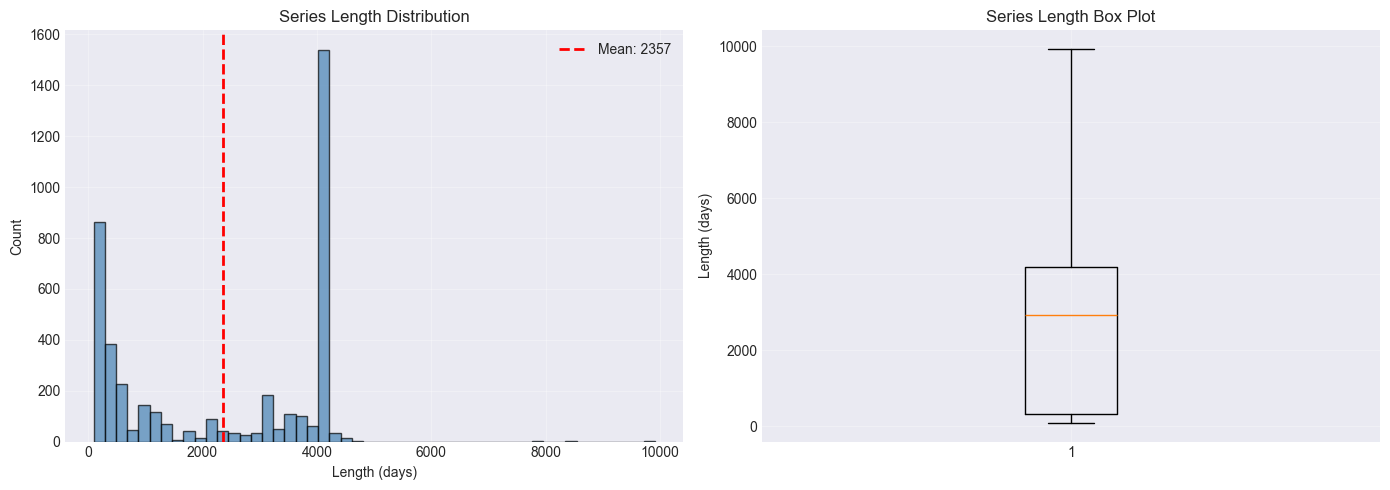

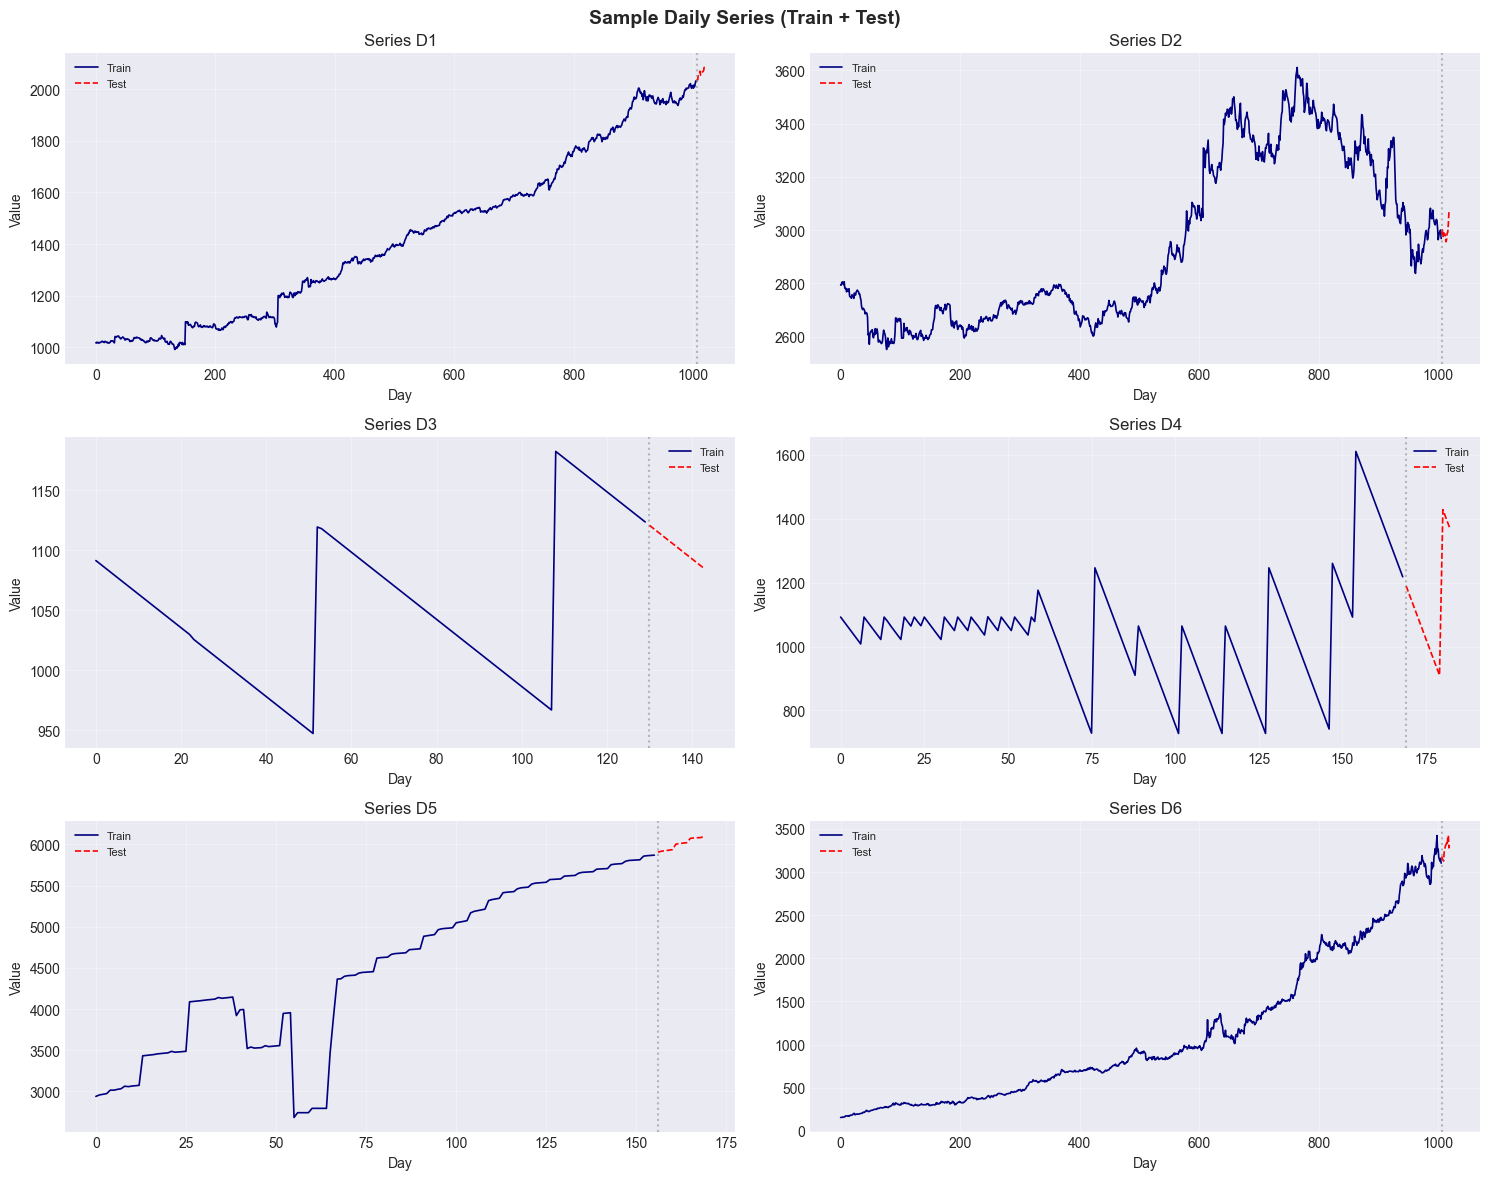


Statistical summary:
        length      mean       std      min        max       cv
count  4227.00   4227.00   4227.00  4227.00    4227.00  4227.00
mean   2357.38   4951.40   1509.55  2480.01    8772.06     0.28
std    1756.57   3188.41   1563.84  1942.42    9007.52     0.22
min      93.00    822.21     22.82    15.00    1053.90     0.02
25%     323.00   1468.27    282.57   875.70    2373.94     0.09
50%    2940.00   5082.30    616.70  1885.00    7061.00     0.27
75%    4197.00   7980.49   2840.70  3770.35   14267.95     0.40
max    9919.00  10005.19  21369.49  9551.00  352000.00     4.08


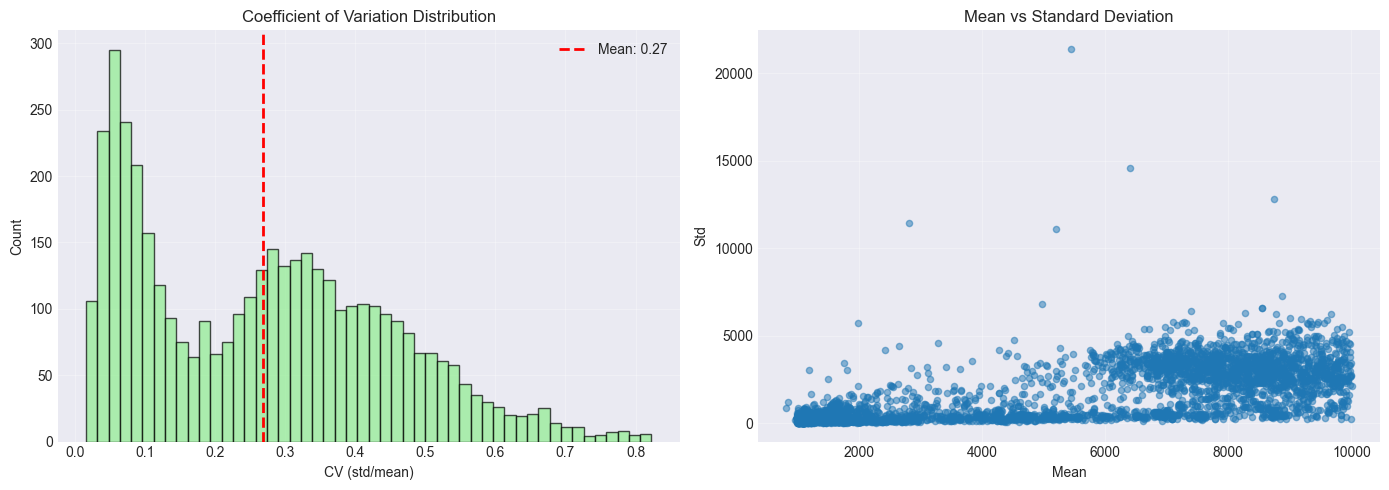


Overall value distribution:
Min: 15.00
Max: 352000.00
Mean: 5687.21
Median: 5232.20
Std: 4238.76


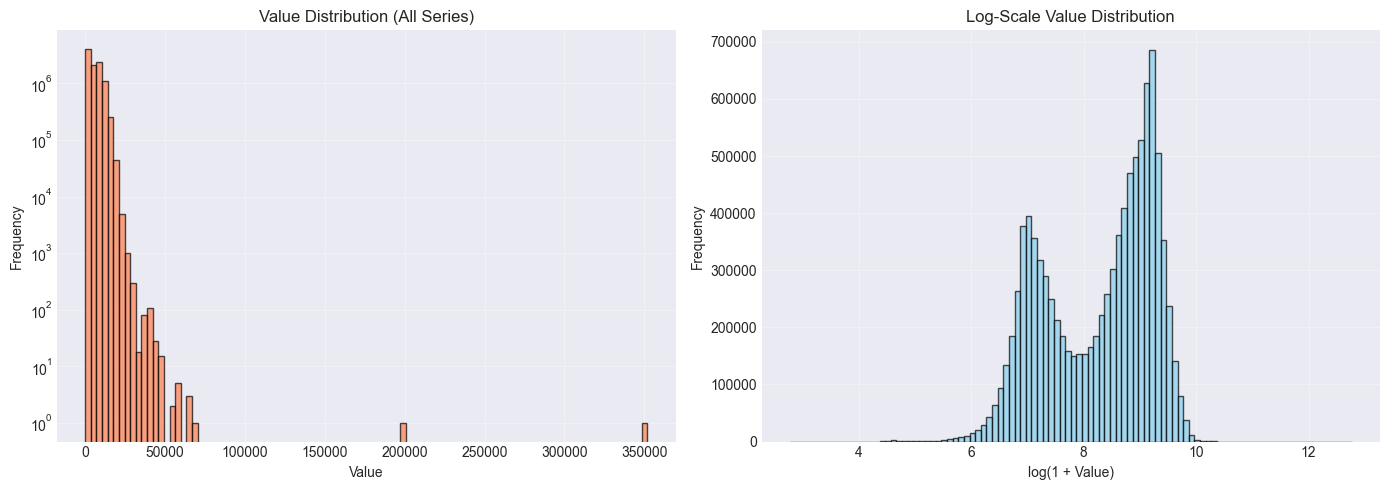


Zero value analysis:
Series with >0% zeros: 0
Series with >10% zeros: 0
Series with >50% zeros: 0
Mean zero percentage: 0.00%


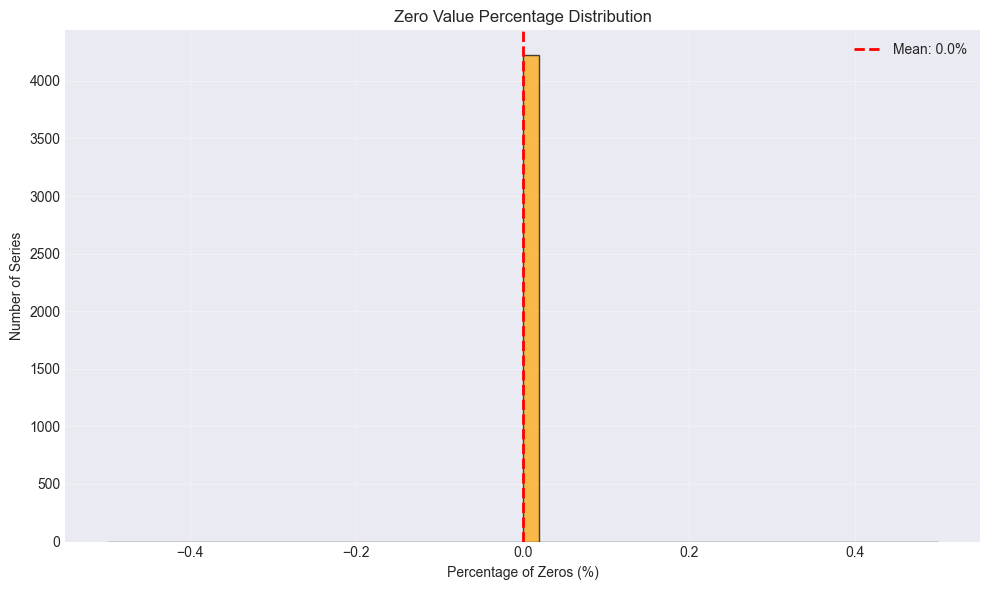


M4 DAILY DATASET SUMMARY

Series count: 4,227
Forecast horizon: 14 days

Series length:
  Range: 93 - 9919 days
  Mean: 2357.4 days
  Median: 2940.0 days

Value statistics:
  Range: 15.00 - 352000.00
  Mean: 5687.21
  CV (avg): 0.28

Zero values:
  Series with zeros: 0 (0.0%)
  Mean zero percentage: 0.00%


In [2]:
# M4 Competition - Daily Data Analysis

# %% [markdown]
# ## Setup

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')

# %% [markdown]
# ## Load Data

# %%
data_path = Path('../data/M4')

train_file = data_path / 'Daily-train.csv'
test_file = data_path / 'Daily-test.csv'

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print(f"Series count: {len(train_df)}")
print(f"Forecast horizon: {test_df.shape[1] - 1} days")

# %% [markdown]
# ## Series Length Distribution

# %%
lengths = train_df.iloc[:, 1:].notna().sum(axis=1)

print("\nSeries length statistics:")
print(f"Min: {lengths.min()}")
print(f"Max: {lengths.max()}")
print(f"Mean: {lengths.mean():.1f}")
print(f"Median: {lengths.median():.1f}")
print(f"Std: {lengths.std():.1f}")

# %%
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(lengths, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(lengths.mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {lengths.mean():.0f}')
axes[0].set_title('Series Length Distribution')
axes[0].set_xlabel('Length (days)')
axes[0].set_ylabel('Count')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(lengths, vert=True)
axes[1].set_title('Series Length Box Plot')
axes[1].set_ylabel('Length (days)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# %% [markdown]
# ## Sample Series Visualization

# %%
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

# Plot first 6 series
for i in range(6):
    series_id = train_df.iloc[i, 0]
    train_series = train_df.iloc[i, 1:].dropna()
    test_series = test_df.iloc[i, 1:].dropna()
    
    # Plot training data
    axes[i].plot(range(len(train_series)), train_series.values, 
                linewidth=1.2, color='navy', label='Train')
    
    # Plot test data
    test_x = range(len(train_series), len(train_series) + len(test_series))
    axes[i].plot(test_x, test_series.values, 
                linewidth=1.2, color='red', label='Test', linestyle='--')
    
    axes[i].set_title(f'Series {series_id}')
    axes[i].set_xlabel('Day')
    axes[i].set_ylabel('Value')
    axes[i].legend(loc='best', fontsize=8)
    axes[i].grid(True, alpha=0.3)
    axes[i].axvline(len(train_series), color='gray', linestyle=':', alpha=0.5)

plt.suptitle('Sample Daily Series (Train + Test)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# %% [markdown]
# ## Statistical Properties

# %%
stats_list = []

for i in range(len(train_df)):
    series_id = train_df.iloc[i, 0]
    series = train_df.iloc[i, 1:].dropna()
    
    if len(series) > 0:
        stats_list.append({
            'series_id': series_id,
            'length': len(series),
            'mean': series.mean(),
            'std': series.std(),
            'min': series.min(),
            'max': series.max(),
            'cv': (series.std() / series.mean()) if series.mean() != 0 else np.nan
        })

stats_df = pd.DataFrame(stats_list)

print("\nStatistical summary:")
print(stats_df.describe().round(2))

# %% [markdown]
# ## Coefficient of Variation Analysis

# %%
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# CV histogram
cv_clean = stats_df['cv'].dropna()
cv_clean = cv_clean[cv_clean < cv_clean.quantile(0.99)]  # Remove outliers

axes[0].hist(cv_clean, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0].axvline(cv_clean.mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {cv_clean.mean():.2f}')
axes[0].set_title('Coefficient of Variation Distribution')
axes[0].set_xlabel('CV (std/mean)')
axes[0].set_ylabel('Count')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Mean vs Std scatter
axes[1].scatter(stats_df['mean'], stats_df['std'], alpha=0.5, s=20)
axes[1].set_title('Mean vs Standard Deviation')
axes[1].set_xlabel('Mean')
axes[1].set_ylabel('Std')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# %% [markdown]
# ## Value Distribution Analysis

# %%
all_values = []
for i in range(len(train_df)):
    series = train_df.iloc[i, 1:].dropna()
    all_values.extend(series.values)

all_values = np.array(all_values)

print("\nOverall value distribution:")
print(f"Min: {all_values.min():.2f}")
print(f"Max: {all_values.max():.2f}")
print(f"Mean: {all_values.mean():.2f}")
print(f"Median: {np.median(all_values):.2f}")
print(f"Std: {all_values.std():.2f}")

# %%
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(all_values, bins=100, color='coral', edgecolor='black', alpha=0.7)
axes[0].set_title('Value Distribution (All Series)')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].set_yscale('log')
axes[0].grid(True, alpha=0.3)

# Log-scale histogram for better visibility
axes[1].hist(np.log1p(all_values[all_values > 0]), bins=100, 
            color='skyblue', edgecolor='black', alpha=0.7)
axes[1].set_title('Log-Scale Value Distribution')
axes[1].set_xlabel('log(1 + Value)')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# %% [markdown]
# ## Zero Analysis

# %%
zero_counts = []
for i in range(len(train_df)):
    series = train_df.iloc[i, 1:].dropna()
    zero_pct = (series == 0).sum() / len(series) * 100
    zero_counts.append(zero_pct)

zero_counts = np.array(zero_counts)

print("\nZero value analysis:")
print(f"Series with >0% zeros: {(zero_counts > 0).sum()}")
print(f"Series with >10% zeros: {(zero_counts > 10).sum()}")
print(f"Series with >50% zeros: {(zero_counts > 50).sum()}")
print(f"Mean zero percentage: {zero_counts.mean():.2f}%")

# %%
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(zero_counts, bins=50, color='orange', edgecolor='black', alpha=0.7)
ax.axvline(zero_counts.mean(), color='red', linestyle='--', linewidth=2,
          label=f'Mean: {zero_counts.mean():.1f}%')
ax.set_title('Zero Value Percentage Distribution')
ax.set_xlabel('Percentage of Zeros (%)')
ax.set_ylabel('Number of Series')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# %% [markdown]
# ## Summary

# %%
print("\n" + "="*80)
print("M4 DAILY DATASET SUMMARY")
print("="*80)
print(f"\nSeries count: {len(train_df):,}")
print(f"Forecast horizon: {test_df.shape[1] - 1} days")
print(f"\nSeries length:")
print(f"  Range: {lengths.min()} - {lengths.max()} days")
print(f"  Mean: {lengths.mean():.1f} days")
print(f"  Median: {lengths.median():.1f} days")
print(f"\nValue statistics:")
print(f"  Range: {all_values.min():.2f} - {all_values.max():.2f}")
print(f"  Mean: {all_values.mean():.2f}")
print(f"  CV (avg): {stats_df['cv'].mean():.2f}")
print(f"\nZero values:")
print(f"  Series with zeros: {(zero_counts > 0).sum()} ({(zero_counts > 0).sum()/len(train_df)*100:.1f}%)")
print(f"  Mean zero percentage: {zero_counts.mean():.2f}%")
print("="*80)